<a href="https://colab.research.google.com/github/Zyuuu-G/Optics_and_Atomic_Physics/blob/main/Atomic_Physics_hw_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atomic physics hw 1
#####Z.Gao
#####9/13/23
1) Use Python to print the radial part of the wavefunction (R_nl) for the n=3, L=0 state.

2) Plot the radial wavefunction for n=4, L=1. How many zeros are there in the wavefunction?

3) Evaluate the expectation value for the radius of the n=4 L=1 state. How does it compare to the ground state value of 3/2 a_0?



In [ ]:
from sympy import*
from sympy.physics.hydrogen import *

# ***code (of all 3 sections) from Dr. Larry Isenhower***

In [ ]:
# problem 1.

r, n, l, z = symbols('r n l z',real=True)
m, theta, phi = symbols('m theta phi',real=True)

R = R_nl(n,l,r,z)#*Ynm(l,m,theta,phi)

print(R.subs([(n,3),(l,0),(m,0),(z,1)]),"\n")
display(R.subs([(n,3),(l,0),(m,0),(z,1)]))


2*sqrt(3)*(2*r**2/9 - 2*r + 3)*exp(-r/3)/27 



2*sqrt(3)*(2*r**2/9 - 2*r + 3)*exp(-r/3)/27

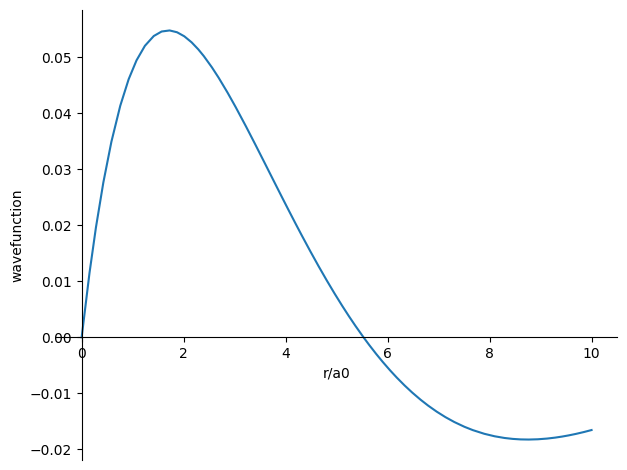

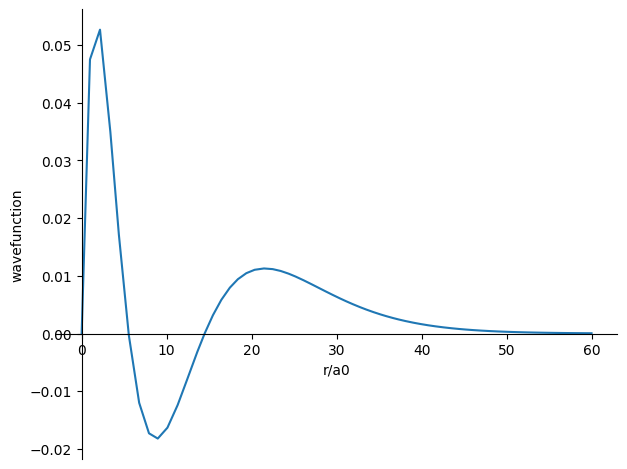

In [ ]:
# problem 2.

#plot the ground state radial wavefunction
plot(R.subs([(n,4),(l,1),(m,0),(z,1)]),(r,0,10),xlabel='r/a0',ylabel='wavefunction')
plot(R.subs([(n,4),(l,1),(m,0),(z,1)]),(r,0,60),xlabel='r/a0',ylabel='wavefunction')

### 3 zeros in the wave function, one at the origien (r=0), one at ~5.5 r/a_0, one at ~14.5 r/a_0, (approaching zreo (but does not cross) when r --> oo)

In [ ]:
# problem 3.

level = 4    # energy level you want to find expectation values for
ang = 1      # l (orb ang. mom.) quantum number
ml=0         # m_l for state
z=1          # nuclear charge Z


r, theta, phi = symbols('r theta phi',real=True)
hbar, a0 = symbols('hbar a0',real=True,positive=True) #note not setting positive gives more complicated answers

# the final .expand(func=True) converts the Ynm part to a function which evaluates nicer
wave=(z/a0)**(3/2)*R_nl(level,ang,r/a0,z)*Ynm(ang,ml,theta,phi).expand(func=True)
wave1=(z/a0)**(3/2)*R_nl(level,ang,r/a0,z)

expectation=integrate(integrate(integrate(conjugate(wave)*r*wave*r**2*sin(theta),(phi,0,2*pi)),(theta,0,pi)),(r,0,oo))
print('The expectation value for the radius is (in units of a0):',expectation)
print("\nThe (total)prob of the ground state (at 3/2a0) is slightly higher then n=4 l=1 state and the distribution is more'clustered'")

The expectation value for the radius is (in units of a0): 23*a0

The (total)prob of the ground state (at 3/2a0) is slightly higher then n=4 l=1 state and the distribution is more'clustered'


#Atomic physics hw 2

Ziyu Gao

9/20/2023


1) What transitions are possible for electric dipole light for a hydrogen atom sitting in the 2S state? Based on your answers, why do you think the 2S state is called a metastable state?

2) Calculate the radial part of the dipole matrix element, eq 2.28, between the following states: (listed in the problem coding block)


In [ ]:
from sympy.physics.hydrogen import *
from sympy import*

In [ ]:
'''
problem 1

For electric dipole light of hydrogen atom in 2S state, 3p, 4p, 5p, 6p (maybe more p?) are the only states it can go to.
Because it doesn't have any "downward" transition, it's called a metastable state.
'''

In [ ]:
from sympy.simplify.fu import RL1
# problem 2

r, n, l, z = symbols('r n l z',real=True)
m, theta, phi, hbar, a0= symbols('m theta phi hbar a0',real=True)

R = R_nl(n,l,r)#*Ynm(l,m,theta,phi)


# 1)  psi1 = psi2, n=3, l=1, ml=0
p3P3P=integrate(conjugate(R.subs([(n,3),(l,1)]))*r*R.subs([(n,3),(l,1)])*r**2,(r,0,oo))
print('\n 1) psi1 = psi2, n=3, l=1\n',p3P3P)

# 2)  psi1  n=1, l=0.   psi2  n=2, l=1.
p1S2P=integrate(conjugate(R.subs([(n,1),(l,0)]))*r*R.subs([(n,2),(l,1)])*r**2,(r,0,oo))
print('\n 2) psi1  n=1, l=0.   psi2  n=2, l=1.\n',p1S2P)

# 3)  psi1  n=1, l=0.   psi2  n=10, l=1.
p1S10P=integrate(conjugate(R.subs([(n,1),(l,0)]))*r*R.subs([(n,10),(l,1)])*r**2,(r,0,oo))
print('\n 3) psi1  n=1, l=0.   psi2  n=10, l=1.\n',p1S10P)

print("\n Do they lack normalization constants or r=r/a0?")


 1) psi1 = psi2, n=3, l=1
 25/2

 2) psi1  n=1, l=0.   psi2  n=2, l=1.
 128*sqrt(6)/243

 3) psi1  n=1, l=0.   psi2  n=10, l=1.
 229582512000*sqrt(110)/34522712143931

 Do they lack normalization constants or r=r/a0?


In [ ]:
# thermo
from sympy import*
num, h, t, mul = symbols("num h t mul")
NN= factorial(num)
print(NN.subs(num,0,10))
#mul = (factorial(num)/(factorial(h)*factorial(num-h)!))

ValueError: ignored

In [ ]:
import numpy as np
#import numpy.math as math

num=50
h = np.arange(0,100,1)

mul = (np.factorial(num))/np.factorial(h)*np.factorial(num-h)!

SyntaxError: ignored

# Atomic physics hw 3

Ziyu Gao

10/16/2023

1) Calculate the energy shift for the $3P_{1/2}$ and $3P_{3/2}$
 states of Hydrogen due to the spin orbit interaction (fine structure). If you were observing light emitted from these levels when they fall back to the ground state, what would be the difference in wavelength for the two transitions?

2) Calculate the ground state hyperfine splitting for Cs given that $A=h(2.2981579425 GHz)$. This splitting is defined exactly as it is the current definition of the second.

3) Describe the quantum numbers for all possible states that can be reached from the following state using electric dipole radiation: $|nlIjFm_F>=|3,D,1/2,3/2,1,0>$

4) The Cs ground state is a $6S_{1/2}$ state and $^{133}Cs$ for Cs. What are the possible F and $m_F$ states for the ground state of Cs? Write them in the shortened form: $|Fm_F>$


# Atomic physics hw 4

In [ ]:
from sympy import*
from sympy.physics.hydrogen import *

1. a)

In [ ]:
# 1

# *code below from Dr.I*
r_1, r_2, n, l, z = symbols('r_1 r_2 n l z',real=True)
m, theta, phi = symbols('m theta phi',real=True)

# radial wavefunction called as: R_nl(n,l,r,z)

# create function to return the integral for a specific pair of states we are considering
def mat_element(n_array):
    return integrate(integrate(R_nl(n_array[0],0,r_1,2)*R_nl(n_array[2],0,r_1,2)*(1/Max(r_1,r_2))*R_nl(n_array[1],0,r_2,2)*R_nl(n_array[3],0,r_2,2)*r_1**2*r_2**2,(r_1,0,oo)),(r_2,0,oo))


# define a second one doing the r2 integral first as this seems to work better in some cases.
def mat_element2(n_array):
    return integrate(integrate(R_nl(n_array[0],0,r_1,2)*R_nl(n_array[2],0,r_1,2)*(1/Max(r_1,r_2))*R_nl(n_array[1],0,r_2,2)*R_nl(n_array[3],0,r_2,2)*r_1**2*r_2**2,(r_2,0,oo)),(r_1,0,oo))


# create a list of the basis atomic states to use. The number represents n for the normal
# hydrogen atomic states |n, l, m_l>. So here we'll have two states one for each electron
# the notation here is [n_1, n_2] which would map to states of: |n_1,0,0> |n_2,0,0>
base_states = [[1,1],[1,2],[2,1],[1,3],[3,1]]
print(base_states)


[[1, 1], [1, 2], [2, 1], [1, 3], [3, 1]]


In [ ]:
# 1s1s. # R* = R?
integrate(integrate(R_nl(1,0,r_1,2)*R_nl(4,0,r_1,2)*(1/Max(r_1,r_2))*R_nl(4,0,r_2,2)*R_nl(1,0,r_2,2)*r_1**2*r_2**2,(r_2,0,oo)),(r_1,0,oo))



45696/9765625

In [ ]:

full_list = []
for i in range(len(base_states)):
    for j in range(len(base_states)):
        full_list.append([base_states[i],base_states[j]])

print(full_list)
print('number of states found: ',len(full_list))

[[[1, 1], [1, 1]], [[1, 1], [1, 2]], [[1, 1], [2, 1]], [[1, 1], [1, 3]], [[1, 1], [3, 1]], [[1, 2], [1, 1]], [[1, 2], [1, 2]], [[1, 2], [2, 1]], [[1, 2], [1, 3]], [[1, 2], [3, 1]], [[2, 1], [1, 1]], [[2, 1], [1, 2]], [[2, 1], [2, 1]], [[2, 1], [1, 3]], [[2, 1], [3, 1]], [[1, 3], [1, 1]], [[1, 3], [1, 2]], [[1, 3], [2, 1]], [[1, 3], [1, 3]], [[1, 3], [3, 1]], [[3, 1], [1, 1]], [[3, 1], [1, 2]], [[3, 1], [2, 1]], [[3, 1], [1, 3]], [[3, 1], [3, 1]]]
number of states found:  25


In [ ]:
# define the atomic energies to fill in the diagonals of the Hamiltonian matrix
# this is using Hartree energy units: 1 hartree = 2*13.6 eV
def E_n(n,z):
    return -1/2*z**2/n[0]**2-1/2*z**2/n[1]**2

In [ ]:
# create the hamiltonian matrix
Ham_mat = zeros(5,5)
#display(Ham_mat)

# fill in the diagonals:
for i in range(5):
    Ham_mat[i,i]=E_n(full_list[5*i][0],2)

display(Ham_mat)

Matrix([
[-4.0,    0,    0,                 0,                 0],
[   0, -2.5,    0,                 0,                 0],
[   0,    0, -2.5,                 0,                 0],
[   0,    0,    0, -2.22222222222222,                 0],
[   0,    0,    0,                 0, -2.22222222222222]])

In [ ]:
# sympy struggles with some of the integrals so I found a timing trick to give up after 10 seconds
# this trick uses a linux timer utility (sorry windows users...) to raise an exception at 10 seconds
import signal
import time

# setup the routine to handle the timer
def timeout_handler(num, stack):
    print("Received SIGALRM")
    raise Exception("FUBAR")

signal.signal(signal.SIGALRM, timeout_handler)


# only calculate lower half of matrix then can use symmetry to set other values
for i in range(5):
    for j in range(i+1):
        # set timer to 10 seconds
        signal.alarm(10)

        try:
            Ham_mat[i,j]+=mat_element(flatten(full_list[5*i+j]))
            print('finished ',[i,j],' element')
        except Exception as ex:
            if "FUBAR" in ex.args:
                print('too slow try other order')
                signal.alarm(10)
                try:
                    Ham_mat[i,j]+=mat_element2(flatten(full_list[5*i+j]))
                    print('finished ',[i,j],' element')
                except Exception as ex:
                    if "FUBAR" in ex.args:
                        print('failed again at: ',i,j,' doing: ',flatten(full_list[5*i+j]))
        finally:
            signal.alarm(0)

finished  [0, 0]  element
finished  [1, 0]  element
finished  [1, 1]  element
finished  [2, 0]  element
finished  [2, 1]  element
finished  [2, 2]  element
finished  [3, 0]  element
Received SIGALRM
too slow try other order
finished  [3, 1]  element
finished  [3, 2]  element
finished  [3, 3]  element
finished  [4, 0]  element
finished  [4, 1]  element
finished  [4, 2]  element
finished  [4, 3]  element
finished  [4, 4]  element


In [ ]:
display(Ham_mat.evalf())

Matrix([
[             -2.75,                  0,                  0,                 0,                 0],
[ 0.178710066838823,  -2.08024691358025,                  0,                 0,                 0],
[ 0.178710066838823, 0.0438957475994513,  -2.08024691358025,                 0,                 0],
[0.0879188989921962,  0.101052953825573, 0.0224458369965822, -2.02324761284722,                 0],
[0.0879188989921962, 0.0224458369965822,  0.101052953825573,  0.01153564453125, -2.02324761284722]])

1. b)  -2.75 is relatively close to -2.841

2. a) include 4s1s, 1s4s

In [ ]:
base_states_2=[[1,1],[1,2],[2,1],[1,3],[3,1],[1,4],[4,1]]

full_list_2 = []
for i in range(len(base_states_2)):
    for j in range(len(base_states_2)):
        full_list_2.append([base_states_2[i],base_states_2[j]])

print(full_list_2)
print('number of states found: ',len(full_list_2))

[[[1, 1], [1, 1]], [[1, 1], [1, 2]], [[1, 1], [2, 1]], [[1, 1], [1, 3]], [[1, 1], [3, 1]], [[1, 1], [1, 4]], [[1, 1], [4, 1]], [[1, 2], [1, 1]], [[1, 2], [1, 2]], [[1, 2], [2, 1]], [[1, 2], [1, 3]], [[1, 2], [3, 1]], [[1, 2], [1, 4]], [[1, 2], [4, 1]], [[2, 1], [1, 1]], [[2, 1], [1, 2]], [[2, 1], [2, 1]], [[2, 1], [1, 3]], [[2, 1], [3, 1]], [[2, 1], [1, 4]], [[2, 1], [4, 1]], [[1, 3], [1, 1]], [[1, 3], [1, 2]], [[1, 3], [2, 1]], [[1, 3], [1, 3]], [[1, 3], [3, 1]], [[1, 3], [1, 4]], [[1, 3], [4, 1]], [[3, 1], [1, 1]], [[3, 1], [1, 2]], [[3, 1], [2, 1]], [[3, 1], [1, 3]], [[3, 1], [3, 1]], [[3, 1], [1, 4]], [[3, 1], [4, 1]], [[1, 4], [1, 1]], [[1, 4], [1, 2]], [[1, 4], [2, 1]], [[1, 4], [1, 3]], [[1, 4], [3, 1]], [[1, 4], [1, 4]], [[1, 4], [4, 1]], [[4, 1], [1, 1]], [[4, 1], [1, 2]], [[4, 1], [2, 1]], [[4, 1], [1, 3]], [[4, 1], [3, 1]], [[4, 1], [1, 4]], [[4, 1], [4, 1]]]
number of states found:  49


In [ ]:
# create the hamiltonian matrix
Ham_mat_2 = zeros(7,7)
#display(Ham_mat)

# fill in the diagonals:
for i in range(7):
    Ham_mat_2[i,i]=E_n(full_list_2[7*i][0],2)

display(Ham_mat_2)

Matrix([
[-4.0,    0,    0,                 0,                 0,      0,      0],
[   0, -2.5,    0,                 0,                 0,      0,      0],
[   0,    0, -2.5,                 0,                 0,      0,      0],
[   0,    0,    0, -2.22222222222222,                 0,      0,      0],
[   0,    0,    0,                 0, -2.22222222222222,      0,      0],
[   0,    0,    0,                 0,                 0, -2.125,      0],
[   0,    0,    0,                 0,                 0,      0, -2.125]])

In [ ]:
# sympy struggles with some of the integrals so I found a timing trick to give up after 10 seconds
# this trick uses a linux timer utility (sorry windows users...) to raise an exception at 10 seconds
import signal
import time

# setup the routine to handle the timer
def timeout_handler(num, stack):
    print("Received SIGALRM")
    raise Exception("FUBAR")

signal.signal(signal.SIGALRM, timeout_handler)

#from numba import njit. # nummba does nort support sympy:(

# only calculate lower half of matrix then can use symmetry to set other values
for i in range(7):
    for j in range(i+1):
        # set timer to 10 seconds
        signal.alarm(10)

        try:
            Ham_mat_2[i,j]+=mat_element(flatten(full_list_2[7*i+j]))
            print('finished ',[i,j],' element')
        except Exception as ex:
            if "FUBAR" in ex.args:
                print('too slow try other order')
                signal.alarm(10)
                try:
                    Ham_mat_2[i,j]+=mat_element2(flatten(full_list_2[7*i+j]))
                    print('finished ',[i,j],' element')
                except Exception as ex:
                    if "FUBAR" in ex.args:
                        print('failed again at: ',i,j,' doing: ',flatten(full_list_2[7*i+j]))
        finally:
            signal.alarm(0)

finished  [0, 0]  element
finished  [1, 0]  element
finished  [1, 1]  element
finished  [2, 0]  element
finished  [2, 1]  element
finished  [2, 2]  element
finished  [3, 0]  element
Received SIGALRM
too slow try other order
finished  [3, 1]  element
finished  [3, 2]  element
finished  [3, 3]  element
finished  [4, 0]  element
finished  [4, 1]  element
finished  [4, 2]  element
finished  [4, 3]  element
finished  [4, 4]  element
finished  [5, 0]  element
finished  [5, 1]  element
finished  [5, 2]  element
Received SIGALRM
too slow try other order
finished  [5, 3]  element
finished  [5, 4]  element
Received SIGALRM
too slow try other order
finished  [5, 5]  element
finished  [6, 0]  element
finished  [6, 1]  element
finished  [6, 2]  element
finished  [6, 3]  element
finished  [6, 4]  element
Received SIGALRM
too slow try other order
Received SIGALRM
failed again at:  6 5  doing:  [4, 1, 1, 4]
finished  [6, 6]  element


In [ ]:
display(Ham_mat_2.evalf())

Matrix([
[             -2.75,                  0,                  0,                   0,                   0,           0,           0],
[ 0.178710066838823,  -2.08024691358025,                  0,                   0,                   0,           0,           0],
[ 0.178710066838823, 0.0438957475994513,  -2.08024691358025,                   0,                   0,           0,           0],
[0.0879188989921962,  0.101052953825573, 0.0224458369965822,   -2.02324761284722,                   0,           0,           0],
[0.0879188989921962, 0.0224458369965822,  0.101052953825573,    0.01153564453125,   -2.02324761284722,           0,           0],
[0.0552137190761018, 0.0574313871355265, 0.0142681408230599,  0.0576773736826854, 0.00734499767968718, -2.00973344,           0],
[0.0552137190761018, 0.0142681408230599, 0.0574313871355265, 0.00734499767968718,  0.0576773736826854,           0, -2.00973344]])

2. a) include 1s5s, 5s1s

In [ ]:
base_states_5=[[1,1],[1,2],[2,1],[1,3],[3,1],[1,4],[4,1],[1,5],[5,1]]

full_list_5 = []
for i in range(len(base_states_5)):
    for j in range(len(base_states_5)):
        full_list_5.append([base_states_5[i],base_states_5[j]])

#print(full_list_5)
print('number of states found: ',len(full_list_5))

Ham_mat_5 = zeros(9,9)

# fill in the diagonals:
for i in range(9):
    Ham_mat_5[i,i]=E_n(full_list_5[9*i][0],2)

display(Ham_mat_5)

number of states found:  81


Matrix([
[-4.0,    0,    0,                 0,                 0,      0,      0,     0,     0],
[   0, -2.5,    0,                 0,                 0,      0,      0,     0,     0],
[   0,    0, -2.5,                 0,                 0,      0,      0,     0,     0],
[   0,    0,    0, -2.22222222222222,                 0,      0,      0,     0,     0],
[   0,    0,    0,                 0, -2.22222222222222,      0,      0,     0,     0],
[   0,    0,    0,                 0,                 0, -2.125,      0,     0,     0],
[   0,    0,    0,                 0,                 0,      0, -2.125,     0,     0],
[   0,    0,    0,                 0,                 0,      0,      0, -2.08,     0],
[   0,    0,    0,                 0,                 0,      0,      0,     0, -2.08]])

In [ ]:
for i in range(9):
    for j in range(i+1):
        # set timer to 10 seconds
        signal.alarm(10)

        try:
            Ham_mat_5[i,j]+=mat_element(flatten(full_list_5[9*i+j]))
            print('finished ',[i,j],' element')
        except Exception as ex:
            if "FUBAR" in ex.args:
                print('too slow try other order')
                signal.alarm(10)
                try:
                    Ham_mat_5[i,j]+=mat_element2(flatten(full_list_5[9*i+j]))
                    print('finished ',[i,j],' element')
                except Exception as ex:
                    if "FUBAR" in ex.args:
                        print('failed again at: ',i,j,' doing: ',flatten(full_list_5[9*i+j]))
        finally:
            signal.alarm(0)

finished  [0, 0]  element
finished  [1, 0]  element
finished  [1, 1]  element
finished  [2, 0]  element
finished  [2, 1]  element
finished  [2, 2]  element
finished  [3, 0]  element
Received SIGALRM
too slow try other order
finished  [3, 1]  element
finished  [3, 2]  element
finished  [3, 3]  element
finished  [4, 0]  element
finished  [4, 1]  element
finished  [4, 2]  element
finished  [4, 3]  element
finished  [4, 4]  element
finished  [5, 0]  element
finished  [5, 1]  element
finished  [5, 2]  element
Received SIGALRM
too slow try other order
finished  [5, 3]  element
finished  [5, 4]  element
Received SIGALRM
too slow try other order
finished  [5, 5]  element
finished  [6, 0]  element
finished  [6, 1]  element
finished  [6, 2]  element
finished  [6, 3]  element
finished  [6, 4]  element
Received SIGALRM
too slow try other order
Received SIGALRM
failed again at:  6 5  doing:  [4, 1, 1, 4]
finished  [6, 6]  element
finished  [7, 0]  element
Received SIGALRM
too slow try other order
f

In [ ]:
display(Ham_mat_5.evalf())

Matrix([
[             -2.75,                  0,                  0,                   0,                   0,                  0,                  0,                 0,                 0],
[ 0.178710066838823,  -2.08024691358025,                  0,                   0,                   0,                  0,                  0,                 0,                 0],
[ 0.178710066838823, 0.0438957475994513,  -2.08024691358025,                   0,                   0,                  0,                  0,                 0,                 0],
[0.0879188989921962,  0.101052953825573, 0.0224458369965822,   -2.02324761284722,                   0,                  0,                  0,                 0,                 0],
[0.0879188989921962, 0.0224458369965822,  0.101052953825573,    0.01153564453125,   -2.02324761284722,                  0,                  0,                 0,                 0],
[0.0552137190761018, 0.0574313871355265, 0.0142681408230599,  0.0576773736826854,

that -2.75 is not changing ..., why should the value of my ground state be different by including more states? It shouldn't, right?


2. b) doesn't seem to converge

3. code taken from Dr. I, no modification made yet. the comparison of 1s2p to the value given by the book is already done by the origional code. Idk what additional I need to do

In [ ]:
# *code below from dr. I** NO MODIFICATION HAS BEEN DONE YET*

r1, r2 = symbols('r1 r2',real=True,positive=True)

#a0 = symbols('a0',real=True,positive=True)

a0=1

# setup 1s state this is the inner electron so z=2
n1=1
l1=0
m1=0
z1=2

R1=(1/a0)**(3/2)*R_nl(n1,l1,r1/a0,z1)


# setup 2p state recall this is for the outer electron
#          so the inner 1s electron is shielding the nucleus so z is ~1
n2=2
l2=1
m2=0
z2=1

R2=(1/a0)**(3/2)*R_nl(n2,l2,r2/a0,z2)

# NOTE: I added a 1/a0 factor here after finding that's what I needed to do
#       by playing with values of a0 like a0=1 and a0=2. Sympy cannot do the
#       exchange integral when a0 is a symbol so I had to make it a number.
constant=(1/.529e-10)*1.6e-19**2/(4*pi.evalf()*8.85e-12)


direct=constant*integrate(integrate((1/r1-1/r2)*R1**2*r1**2,(r1,r2,oo))*R2**2*r2**2,(r2,0,oo))


#print('direct part is: ')
#display(direct)
print('direct part is: (in eV)')
print(direct.subs(a0,.529e-10)/1.6e-19)

#exchange integral
# there are two different expansions of r12 depending on which is larger r1 or r2
# factor12 is for r1 < r2 and factor21 is r2 < r1
# this is based on eq 3.30 in Foot and uses orthogonality to pull out only the l2 value for k
factor12=1/r2*(r1/r2)**l2*1/(2*l2+1)
factor21=1/r1*(r2/r1)**l2*1/(2*l2+1)
exchange12=constant*integrate(integrate(factor12*R1*R2.subs(r2,r1)*R1.subs(r1,r2)*R2*r1**2*r2**2,(r1,0,r2)),(r2,0,oo))
exchange21=constant*integrate(integrate(factor21*R1*R2.subs(r2,r1)*R1.subs(r1,r2)*R2*r1**2*r2**2,(r1,r2,oo)),(r2,0,oo))
print('\nExchange r1<r2 in eV')
print(exchange12/1.6e-19)
print('Exchange r1>r2 in eV')
print(exchange21/1.6e-19)
print('\ntotal exchange shift is: (in eV)')
print((exchange12+exchange21)*2/1.6e-19)

direct part is: (in eV)
-0.0282842400974992

Exchange r1<r2 in eV
0.0519849828253522
Exchange r1>r2 in eV
0.0519849828253523

total exchange shift is: (in eV)
0.207939931301409
